In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = '/home/teemo/ML/data/ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


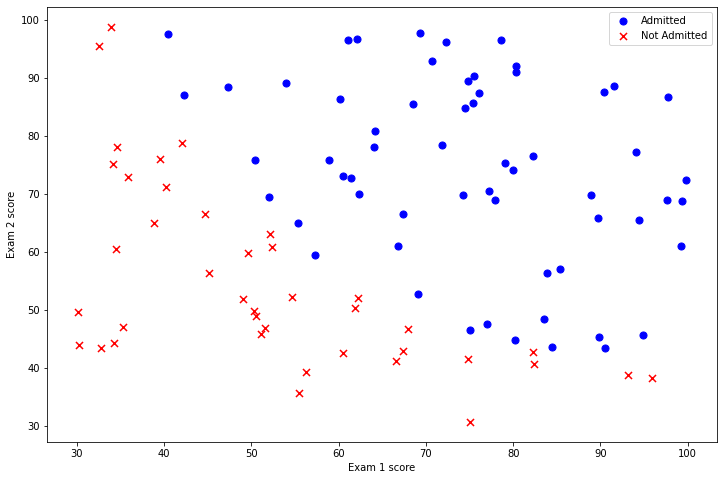

In [4]:
from cProfile import label


positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
plt.show()


In [5]:
#sigmod函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
#逻辑回归代价函数
def cost(theta,x,y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(x * theta.T)))
    second = np.multiply((1-y),np.log(1 - sigmoid(x * theta.T)))
    return np.sum(first - second)/(len(x))    

In [7]:
data.insert(0,'ones',1)

#初始化
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.zeros(3)

#转换类型
x = np.array(x.values)
y = np.array(y.values)


In [8]:
# 检查矩阵的维度
x.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [9]:
# 用初始θ计算代价
cost(theta, x, y)

0.6931471805599453

In [10]:
# 实现梯度计算的函数（并没有更新θ）
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [11]:
from unittest import result
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(x,y))

  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631537E-01   7.89087138E-01
    2    5  5.892425215690646E-01   7.39226659E+01
    3    7  4.227824013349988E-01   1.85265719E+01
    4    9  4.072926963747109E-01   1.68671130E+01
    5   11  3.818854870221429E-01   1.07735103E+01
    6   13  3.786234850041487E-01   2.31584929E+01
tnc: stepmx = 1000
    7   16  2.389268198743758E-01   3.00821998E+00
    8   18  2.047203892405198E-01   1.52227867E-01
    9   20  2.046713898944703E-01   6.62495276E-02
   10   22  2.035303162361215E-01   9.30780876E-04
tnc: fscale = 32.7775
   11   24  2.035293521271776E-01   8.07191978E-06
   12   26  2.035251112915609E-01   1.80213714E-04
   13   28  2.034984109909704E-01   5.02878482E-04
   14   30  2.034978382926863E-01   9.92360567E-06
   15   32  2.034977907837327E-01   3.77843767E-06
   16   34  2.034977388898613E-01   1.94830212E-05
   17   36  2.034977015894746E-01   2.33850311E-13


In [12]:
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [13]:
cost(result[0],x,y)

0.20349770158947458

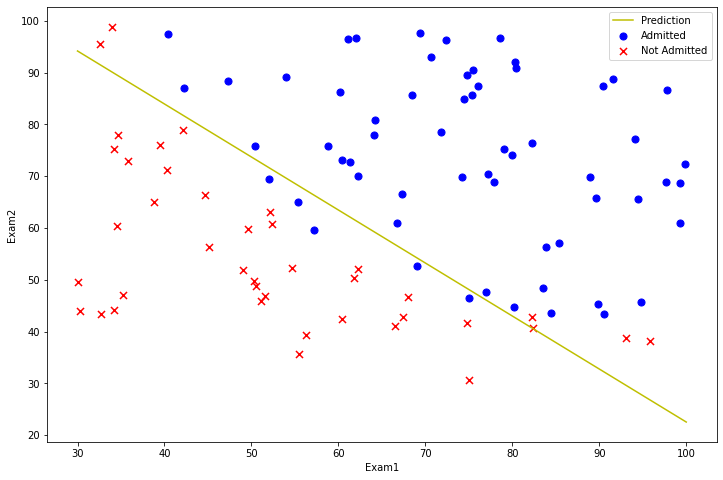

In [17]:
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = (-result[0][0]-result[0][1]*plotting_x1)/result[0][2]

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(plotting_x1,plotting_h1,'y',label = 'Prediction')
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1')
ax.set_ylabel('Exam2')
plt.show()


In [34]:
def hex(theta,x):
    return sigmoid(x@theta.T)
hex(result[0],[1,45,85])

0.7762906240463825

In [31]:
def predict(theta,x):
    probability = sigmoid(x@theta.T)
    return [1 if x>0.5 else 0 for x in probability]


In [40]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min,x)
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions,y)]
accuracy = (sum(map(int,correct))% len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


In [ ]:
#正则化逻辑回归
